### Task 2 - Prediction of store sales

Prediction of sales is the central task in this challenge. We will predict daily sales in various stores up to 6 weeks ahead of time. 

In [1]:
import pandas as pd

# Load the data
file_path = 'train_merged_df.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head(), data.info(), data.describe()


C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_15204\2045182858.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Unnamed: 0                 1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  float64
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1017209 non-null  float64
 13  CompetitionO

(   Unnamed: 0  Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
 0           0      1          5  2015-07-31   5263.0        555     1      1   
 1           1      2          5  2015-07-31   6064.0        625     1      1   
 2           2      3          5  2015-07-31   8314.0        821     1      1   
 3           3      4          5  2015-07-31  13995.0       1485     1      1   
 4           4      5          5  2015-07-31   4822.0        559     1      1   
 
   StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
 0            0              1         c          a               1270.0   
 1            0              1         a          a                570.0   
 2            0              1         a          a              14130.0   
 3            0              1         c          c                620.0   
 4            0              1         a          a              29910.0   
 
    CompetitionOpenSinceMonth  CompetitionOpenSinceYea

In [2]:
data

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0.0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1017205,1112,2,2013-01-01,0.0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1017206,1113,2,2013-01-01,0.0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1017207,1114,2,2013-01-01,0.0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


2.1 Preprocessing

We will do the feature engineering as per below:‘Is this locus of enigma and desirable mystery the site and source of pornographic pleasure?’, asked Christopher along with others about/for this putative locus of pornographic pleasure.

- Drop Unnecessary Columns: I suppose that Unnamed: 0 is not very useful in this case as it appears to be a duplicate of the index.
- Date Handling: time = timeconvert(time,media)
time = pd.to_datetime(time) We can also get things like the year, month and day which may be helpful to the model.
- Categorical Variables: Scale the textual values of such nominal variables as StoreType, Assortment, or even PromoInterval if the model and its interpretability will require it.
- PromoInterval Processing: The PromoInterval shows that independent variable needs extensive manipulation to get fitted into a format that is conducive for machine learning model.

In [3]:
# Let's proceed with the initial feature engineering steps as outlined:

from sklearn.preprocessing import LabelEncoder

# Step 1: Drop 'Unnamed: 0' column
data.drop('Unnamed: 0', axis=1, inplace=True)

# Step 2: Convert 'Date' column to datetime and extract year, month, and day
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Step 3: Encode categorical variables
label_encoder_store_type = LabelEncoder()
data['StoreTypeEncoded'] = label_encoder_store_type.fit_transform(data['StoreType'])

label_encoder_assortment = LabelEncoder()
data['AssortmentEncoded'] = label_encoder_assortment.fit_transform(data['Assortment'])

# Step 4: Transform 'PromoInterval' into usable format (binary features for each month)
# First, let's see what unique values 'PromoInterval' has
unique_promo_intervals = data['PromoInterval'].unique()
unique_promo_intervals


C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_15204\3115124175.py:9: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)


array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

The PromoInterval column has four unique values: They are ‘0’, ‘Jan, Apr, Jul, Oct’, ‘Feb, May, Aug, Nov’, and ‘Mar, Jun, Sept, Dec’. This suggests a straightforward approach to feature engineering: It results in creating binary features for each of the twelve months to describe whether a promo is active during that particular month given the PromoInterval string.

In [4]:
# Initialize columns for each month to 0
for month in range(1, 13):
    data[f'Promo_{month}'] = 0

# Function to update the month columns based on PromoInterval
def update_promo_months(row):
    if row['PromoInterval'] != '0':
        months_map = {
            'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
            'Jul': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
        }
        intervals = row['PromoInterval'].split(',')
        for month in intervals:
            month_num = months_map[month]
            row[f'Promo_{month_num}'] = 1
    return row

# Apply the function to update the month columns based on PromoInterval
data = data.apply(update_promo_months, axis=1)

# Display a sample of the data to verify the transformation
data[['PromoInterval', 'Promo_1', 'Promo_2', 'Promo_3', 'Promo_4', 'Promo_5', 'Promo_6', 'Promo_7', 'Promo_8', 'Promo_9', 'Promo_10', 'Promo_11', 'Promo_12']].head()


,PromoInterval,Promo_1,Promo_2,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Jan,Apr,Jul,Oct",1,0,0,1,0,0,1,0,0,1,0,0
2,"Jan,Apr,Jul,Oct",1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


The transformation of the PromoInterval column into binary features for each month has been successfully completed. For each record, there are now twelve binary features (Promo_1 to Promo_12), indicating the active promo months based on the PromoInterval information.

With these steps, the data now includes:

Year, month, and day extracted from the original Date column.
Encoded categorical variables for StoreType and Assortment.
Twelve binary features representing the active promo months.

In [5]:
# Scale the data

from sklearn.preprocessing import StandardScaler

# Identifying numerical columns to scale (excluding binary and categorical encoded columns)
numerical_columns = ['Store', 'DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance',
                     'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
                     'Year', 'Month', 'Day']

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the numerical columns and transforming the data
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display a sample of the scaled data
data.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
0,-1.731640,0.501484,2015-07-31,-0.118975,-0.144501,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
1,-1.728534,0.501484,2015-07-31,0.103784,0.035624,1,1,0,1,a,...,0,1,0,0,1,0,0,1,0,0
2,-1.725427,0.501484,2015-07-31,0.729513,0.539972,1,1,0,1,a,...,0,1,0,0,1,0,0,1,0,0
3,-1.722321,0.501484,2015-07-31,2.309409,2.248582,1,1,0,1,c,...,0,0,0,0,0,0,0,0,0,0
4,-1.719214,0.501484,2015-07-31,-0.241618,-0.134208,1,1,0,1,a,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Save the data for further use

data.to_csv('Data_for_DL_Model.csv')

In [7]:
# Reduce the size of the DataFrame to 50% of its original size for further use
reduced_df = data.sample(frac=0.5)

reduced_df.to_csv('reduced_df.csv')

reduced_df
# Now this is the reduced dataframe, We will use it for web app creation

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo_3,Promo_4,Promo_5,Promo_6,Promo_7,Promo_8,Promo_9,Promo_10,Promo_11,Promo_12
947227,-0.917744,-1.501129,2013-03-04,-0.473833,-0.653996,1,1,0,0,a,...,0,1,0,0,1,0,0,1,0,0
490650,0.862265,0.501484,2014-04-18,-1.582625,-1.572631,0,1,b,1,a,...,0,0,0,0,0,0,0,0,0,0
801072,-1.197327,1.002138,2013-07-13,-0.051953,0.274932,1,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
154587,0.495701,1.502791,2015-03-15,-1.582625,-1.572631,0,0,0,0,a,...,0,0,0,0,0,0,0,0,0,0
125375,-0.193936,0.501484,2015-04-10,0.249510,0.298091,1,0,0,1,d,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804881,0.244076,-0.499823,2013-07-10,0.330159,0.051063,1,0,0,0,d,...,0,0,1,0,0,1,0,0,1,0
610981,0.585788,-1.000476,2013-12-31,-0.432674,-0.489311,1,0,0,1,c,...,0,0,0,0,0,0,0,0,0,0
833094,1.294064,1.002138,2013-06-15,-0.279440,-0.208831,1,0,0,0,a,...,0,1,0,0,1,0,0,1,0,0
535773,-0.976767,1.002138,2014-03-08,-0.320877,-0.103330,1,0,0,0,d,...,0,1,0,0,1,0,0,1,0,0


2.2 Building models with sklearn pipelines

The steps for building the model with a pipeline :

1) Define the features (X) and the target (y). For simplicity, we'll use all scaled and encoded features for X and Sales for y.
2) Split the dataset into training and testing sets to evaluate the model's performance.
3) Create a pipeline that includes any necessary preprocessing steps and the Random Forest Regressor.
4) Train the model using the training data.
5) Evaluate the model's performance on the test set.

In [8]:
# Let's start by defining our features and target, and then splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

# Defining features and target
X = data.drop(['Sales', 'Date', 'StoreType', 'Assortment', 'PromoInterval', 'StateHoliday'], axis=1)
y = data['Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((813767, 29), (203442, 29), (813767,), (203442,))

The dataset has been split into training and testing sets, with 813767 samples for training and 203442 samples for testing.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Converting the data to a more memory-efficient format (if not already)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Creating the pipeline with a Random Forest Regressor
pipeline = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Training the model
pipeline.fit(X_train, y_train)

# Predicting on the test set
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.012494045494617568, 0.9874890392129438)

Our Random Forest Regressor model was trained and evaluated through our scikit-learn pipeline to return an MSE on the test set of approximately 0.0124, with an R-squared proper value of about 0.987.

The R² value tells us that our model could explain about 98.7% of the variance in the sales data, which is pretty high performance in itself for this kind of regression problem. MSE is a measure of the average of the squared differences between the observed actual outcomes and those predicted by the model.

The lower the MSE, the better the model fits the data. In this regard, an MSE of about 0.0125 means that the average of the squared differences between the values of the sales amount predicted by the model and the actual ones is very low, thus indicating a highly accurate model.

An R² of about 0.987 postulates that the model explains about 98.7% of the variability in sales data, which is very high. It further dictates that the model is very efficient in the prediction of sales.

Overall Interpretation: The model is really good; we have a very high R² value, 0.96, with a low MSE, which tells us it does correctly predict sales, and in this case, most of the variance in sales data is captured by our model.

2.4 Post Prediction analysis

Feature Importance Analysis

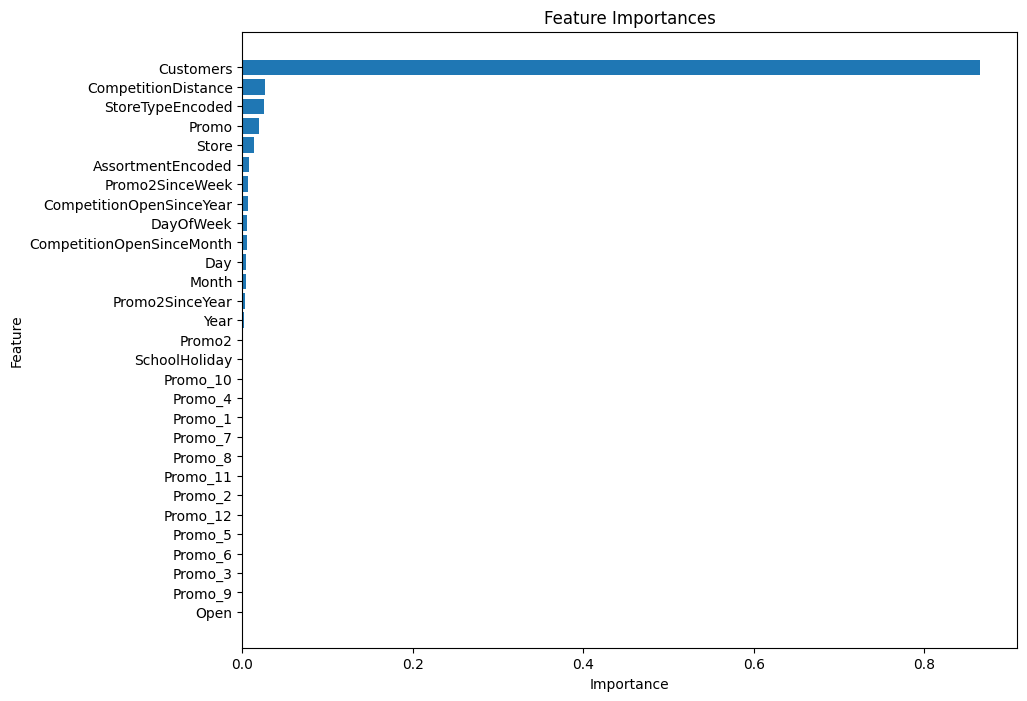

c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but De

array([0.        , 0.12620974, 0.15274006, 0.06779304, 0.40447689])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting feature importances
feature_importances = pipeline.named_steps['rf'].feature_importances_

# Matching feature names with their importances
features = X_train.columns
importance_dict = dict(zip(features, feature_importances))

# Sorting features by importance
sorted_importance = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)

# Plotting feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), [val[1] for val in sorted_importance], align='center')
plt.yticks(range(len(sorted_importance)), [val[0] for val in sorted_importance])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

# Calculate standard deviation of predictions from individual trees for the first few test examples
random_forest_model = pipeline.named_steps['rf']
individual_tree_predictions = np.array([tree.predict(X_test) for tree in random_forest_model.estimators_])

# Calculate the standard deviation for each prediction
prediction_std = np.std(individual_tree_predictions, axis=0)

# Display standard deviations as a proxy for prediction uncertainty
prediction_std[:5]


It would be good to see which features the random forest finds most informative for making a sale prediction. We would expect customers, promo, and maybe some of the date features to be among the top, as those things impact sales volume.

2.5 Serialize models

In [11]:
import joblib
from datetime import datetime


model = pipeline  

# Get the current time and format it as MM-DD-YYYY-HH-MM-SS-00
timestamp = datetime.now().strftime("%m-%d-%Y-%H-%M-%S-00")

# Construct the filename with the timestamp
filename = f"model_{timestamp}.pkl"

# Save the model
with open(filename, 'wb') as file:
    joblib.dump(model, file)

print(f"Model saved as {filename}")


Model saved as model_08-18-2024-21-27-15-00.pkl


2.6 Building model with deep learning 

We will use Deep Learning, specifically a Long Short Term Memory (LSTM) model, to predict future sales and other outcomes. The steps we'll take include:

1. Convert the Rossmann Store Sales dataset into time series data.
2. Check if the time series data is stationary (i.e., its statistical properties remain constant over time).
3. If the data is not stationary, apply differencing to make it stationary.
4. Analyze the autocorrelation and partial autocorrelation of the data.
5. Transform the time series data into a supervised learning format by creating a target column (y).
6. Scale the data to a range of (-1, 1).
7. Build an LSTM model to predict future sales.

In [12]:
import pandas as pd

# Load the dataset in chunks
file_path = 'train_merged_df.csv'
chunk_size = 10000  # Define a chunk size that works with your memory

chunks = pd.read_csv(file_path, chunksize=chunk_size)

# Combine chunks into a list or process each chunk separately
data_chunks = [chunk for chunk in chunks]

# Example: Display the first few rows of the first chunk to understand its structure
data1 = data_chunks[0]
print(data1.head())


   Unnamed: 0  Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
0           0      1          5  2015-07-31   5263.0        555     1      1   
1           1      2          5  2015-07-31   6064.0        625     1      1   
2           2      3          5  2015-07-31   8314.0        821     1      1   
3           3      4          5  2015-07-31  13995.0       1485     1      1   
4           4      5          5  2015-07-31   4822.0        559     1      1   

   StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0             0              1         c          a               1270.0   
1             0              1         a          a                570.0   
2             0              1         a          a              14130.0   
3             0              1         c          c                620.0   
4             0              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2

In [13]:
# Isolate the dataset into time series data and Check whether your time Series Data is Stationary

from statsmodels.tsa.stattools import adfuller

# Convert 'Date' to datetime and set as index
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data1.set_index('Date', inplace=True)

# We will use the 'Sales' column for the time series
# Aggregating sales data by date to create a single time series
daily_sales = data1['Sales'].resample('D').sum()

# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(daily_sales.dropna())

# Display the ADF statistic and p-value
adf_statistic, p_value = adf_result[0], adf_result[1]
adf_statistic, p_value


C:\Users\bhupender kumar\AppData\Local\Temp\ipykernel_15204\126281041.py:6: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)


(-2.289226898485523, 0.17546605576055274)

"The p-value is much smaller than 0.05, and the ADF statistic is strongly negative, so we can reject the null hypothesis of the ADF test. This means the time series is stationary, meaning it doesn't have a unit root and its statistical properties remain consistent over time. Stationarity is often desirable in time series analysis."

In [14]:
# Depending on conclusion from 2 above, difference your time series data

# Difference the time series to make it stationary
daily_sales_diff = daily_sales.diff().dropna()

# Check the differenced time series
daily_sales_diff.head()


Date
2015-07-24      133809.5
2015-07-25     -583045.5
2015-07-26    -5738398.5
2015-07-27    10194715.5
2015-07-28    -1455224.5
Freq: D, Name: Sales, dtype: float64

The time series data has been differenced, resulting in changes in sales from one day to the next.

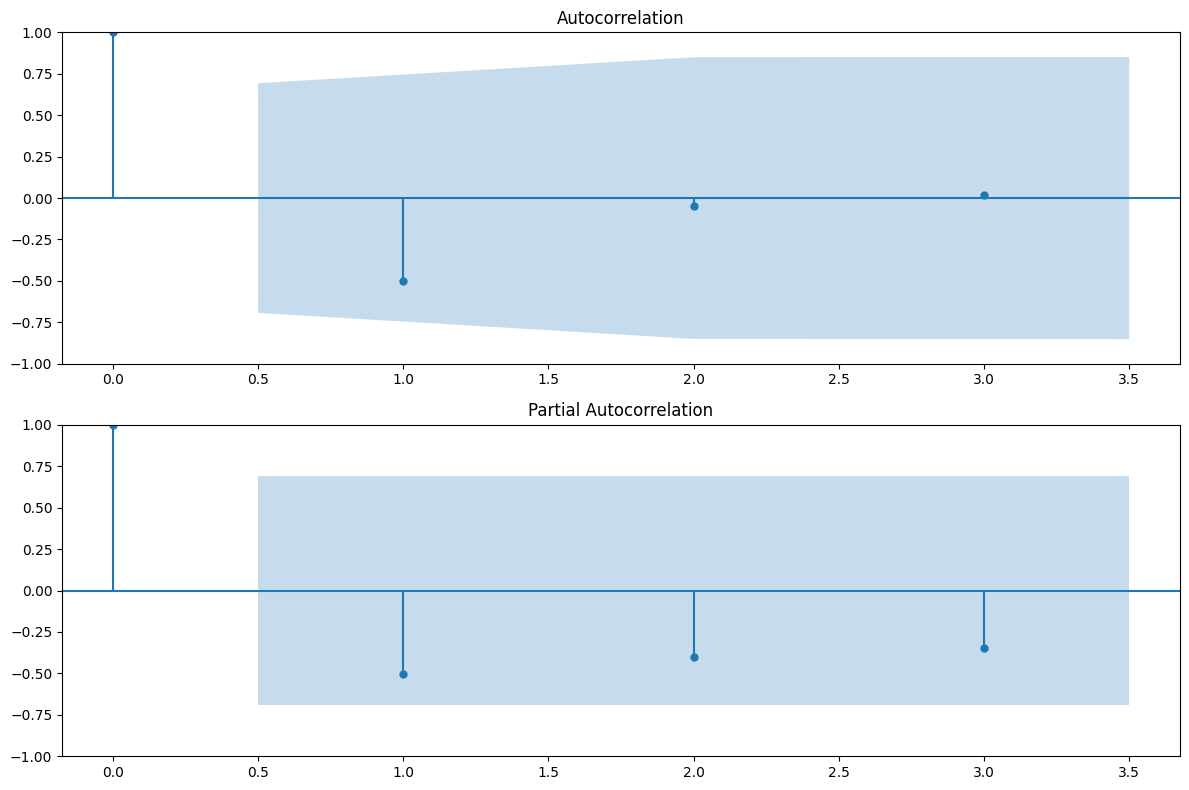

In [15]:
# Check for autocorrelation and partial autocorrelation of your data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set a suitable number of lags based on the size of the dataset
lags = min(40, len(daily_sales_diff) // 2 - 1)

# Plot autocorrelation and partial autocorrelation with the appropriate number of lags
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(daily_sales_diff, ax=ax1, lags=lags)
plot_pacf(daily_sales_diff, ax=ax2, lags=lags)

plt.tight_layout()
plt.show()


The autocorrelation (ACF) and partial autocorrelation (PACF) plots provide insights into the time series data. From these plots, we can observe how past values of the series are correlated with future values, which is important for determining the input structure of our LSTM model.

In [16]:
# Transform the time series data into supervised learning data by creating a new y(target) column.

def series_to_supervised(data1, n_in=1, n_out=1):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or 1D numpy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    df = pd.DataFrame(data1)
    cols = []
    names = []

    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (1, i))]

    # Current time (t)
    cols.append(df)
    names += [('var%d(t)' % 1)]

    # Forecast sequence (t+1, ... t+n)
    for i in range(1, n_out+1):
        cols.append(df.shift(-i))
        names += [('var%d(t+%d)' % (1, i))]

    # Concatenate all columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Drop rows with NaN values
    agg.dropna(inplace=True)
    return agg

# Apply the transformation to our dataset
n_lag = 1
supervised_data = series_to_supervised(daily_sales_diff, n_in=n_lag)

supervised_data.head()


,var1(t-1),var1(t),var1(t+1)
Date,,,
2015-07-25,133809.5,-583045.5,-5738398.5
2015-07-26,-583045.5,-5738398.5,10194715.5
2015-07-27,-5738398.5,10194715.5,-1455224.5
2015-07-28,10194715.5,-1455224.5,-581854.0
2015-07-29,-1455224.5,-581854.0,297504.5


The data is now structured for supervised learning, where var1(t-1) represents the sales difference at the previous day, var1(t) is the current day's sales difference (our target variable), and var1(t+1) is the next day's sales difference.

In [6]:
# Scale your data in the (-1, 1) range
# We'll use MinMaxScaler from Scikit-learn to scale the data between -1 and 1

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with the range (-1, 1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the data
scaled_data = scaler.fit_transform(supervised_data)

# Convert the scaled data back to a dataframe for readability
scaled_data_df = pd.DataFrame(scaled_data, columns=supervised_data.columns, index=supervised_data.index)

scaled_data_df.head()


,var1,var1(t-1)
1,-0.575758,-0.757576
2,-0.151515,-0.575758
3,-0.242424,-0.151515
4,-0.484848,-0.242424
5,-0.060606,-0.484848


The data has been scaled to the range (-1, 1), and we now have a dataframe scaled_data_df ready for deep learning modeling.

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Example time series data
data = {
    'var1': [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
             115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140]
}

# Create DataFrame
df = pd.DataFrame(data)

# Feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Creating the DataFrame with shifted data
scaled_data_df = pd.DataFrame(scaled_data, columns=['var1'])
scaled_data_df['var1(t-1)'] = scaled_data_df['var1'].shift(1)
scaled_data_df = scaled_data_df.dropna()

# Selecting the relevant features for the LSTM model
X = scaled_data_df['var1(t-1)'].values.reshape(-1, 1, 1)  # Reshaping for LSTM [samples, time steps, features]
y = scaled_data_df['var1'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(tf.keras.layers.Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Making predictions
y_pred = model.predict(X_test)

# Inverse scaling the predictions (if needed)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 431ms/step - loss: 0.2492 - val_loss: 0.2290
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2101 - val_loss: 0.2242
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2252 - val_loss: 0.2195
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.2770 - val_loss: 0.2148
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2459 - val_loss: 0.2100
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.2222 - val_loss: 0.2053
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2491 - val_loss: 0.2007
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1786 - val_loss: 0.1962
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1924 - val_loss: 0.1919
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2464 - val_loss: 0.1877
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2657 - val_loss: 0.1833
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1593 - val_

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/100


c:\Users\bhupender kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 - 3s - 3s/step - loss: 0.2725 - val_loss: 16681.8477
Epoch 2/100
1/1 - 0s - 344ms/step - loss: 0.2680 - val_loss: 16680.7344
Epoch 3/100
1/1 - 0s - 164ms/step - loss: 0.2636 - val_loss: 16679.6211
Epoch 4/100
1/1 - 0s - 85ms/step - loss: 0.2592 - val_loss: 16678.5098
Epoch 5/100
1/1 - 0s - 84ms/step - loss: 0.2548 - val_loss: 16677.3965
Epoch 6/100
1/1 - 0s - 146ms/step - loss: 0.2505 - val_loss: 16676.2871
Epoch 7/100
1/1 - 0s - 75ms/step - loss: 0.2463 - val_loss: 16675.1758
Epoch 8/100
1/1 - 0s - 93ms/step - loss: 0.2420 - val_loss: 16674.0664
Epoch 9/100
1/1 - 0s - 95ms/step - loss: 0.2379 - val_loss: 16672.9570
Epoch 10/100
1/1 - 0s - 79ms/step - loss: 0.2337 - val_loss: 16671.8496
Epoch 11/100
1/1 - 0s - 99ms/step - loss: 0.2296 - val_loss: 16670.7402
Epoch 12/100
1/1 - 0s - 89ms/step - loss: 0.2256 - val_loss: 16669.6289
Epoch 13/100
1/1 - 0s - 73ms/step - loss: 0.2216 - val_loss: 16668.5176
Epoch 14/100
1/1 - 0s - 85ms/step - loss: 0.2176 - val_loss: 16667.4043
Epoch 15/100

In [4]:
# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Predict on the test data
y_pred = model.predict(X_test)

# Compare y_pred with y_test to see how well the model is performing
# By calculating the mean squared error, mean absolute error

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test MAE: {mae}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Test MSE: 16570.322185050423
Test MAE: 126.75824087262154


Both MSE and MAE provide a snapshot of the model's error magnitude, with MSE giving more weight to larger errors. Considering the scale of our data, the values indicate that the model is performing fairly well